In [1]:

import numpy as np 
import pandas as pd 
import scipy.stats as stats
import seaborn as sns 
import matplotlib.pyplot as plt 
import statistics as s
import pickle
import joblib

In [2]:
loan_df = pd.read_csv('loan_data.csv')
loan_df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
loan_df['person_age'].max(),loan_df['person_age'].min()

(np.float64(144.0), np.float64(20.0))

In [4]:
# 1. IQR Method (Box Plot Method)
Q1 = np.percentile(loan_df['person_age'], 25)
Q3 = np.percentile(loan_df['person_age'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound,upper_bound

(np.float64(15.0), np.float64(39.0))

In [5]:
mean = np.mean(loan_df['person_age'])
std = np.std(loan_df['person_age'])
z_score = 3
# z_score = x-mean/std
lower_bound = mean - z_score * std
upper_bound = mean + z_score * std

lower_bound,upper_bound

(np.float64(9.62905464845893), np.float64(45.89930090709663))

In [6]:
new_df = loan_df[loan_df['person_age']<=60]

In [7]:
new_df['person_gender'] = pd.Categorical(new_df['person_gender']).codes # Male - 1 or Female - 0

new_df['person_education'] = pd.Categorical(new_df['person_education']).codes
# Associate - 0, Bachelor - 1,Doctorate - 2 , High School - 3 , Master - 4 

new_df['person_home_ownership'] = pd.Categorical(new_df['person_home_ownership']).codes
# MORTGAGE - 0 , OTHER - 1 , OWN - 2, RENT - 3 

new_df['loan_intent'] = pd.Categorical(new_df['loan_intent']).codes
# DEBTCONSOLIDATION - 0 , EDUCATION - 1 , HOMEIMPROVEMENT - 2 , MEDICAL - 3 , PERSONAL - 4 , VENTURE - 5

new_df['previous_loan_defaults_on_file'] = pd.Categorical(new_df['previous_loan_defaults_on_file']).codes
# No - 0 , Yes - 1

C:\Users\DELL\AppData\Local\Temp\ipykernel_21964\1211791345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['person_gender'] = pd.Categorical(new_df['person_gender']).codes # Male - 1 or Female - 0
C:\Users\DELL\AppData\Local\Temp\ipykernel_21964\1211791345.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['person_education'] = pd.Categorical(new_df['person_education']).codes
C:\Users\DELL\AppData\Local\Temp\ipykernel_21964\1211791345.py:6: SettingWithCopyWarning: 
A value is trying to b

In [8]:
# new_df.drop(['previous_loan_defaults_on_file'],inplace=True,axis=1)
# #new_df.drop(['credit_score'],inplace=True,axis=1)
# new_df.drop(['cb_person_cred_hist_length'],inplace=True,axis=1)
# new_df.drop(['loan_int_rate'],inplace=True,axis=1)
# new_df.drop(['loan_percent_income'],inplace=True,axis=1)

In [9]:
loan_df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [10]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score,KFold,train_test_split , GridSearchCV , cross_val_predict , cross_validate
from sklearn.metrics import mean_squared_error,classification_report,confusion_matrix,accuracy_score,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import *
from sklearn.preprocessing import StandardScaler

In [11]:
#new_df.drop(['credit_score'],axis=1,inplace=True)

In [12]:
X = new_df.drop(['loan_status'],axis=1)
X

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0
44996,37.0,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0
44997,33.0,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0
44998,29.0,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0


In [13]:
y = new_df[['loan_status']]
y

,loan_status
0,1
1,0
2,1
3,1
4,1
...,...
44995,1
44996,1
44997,1
44998,1


In [14]:
seed = 41 # 6
scoring = 'accuracy'

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=seed) # stratify=None

In [16]:
X_train.size,X_test.size

(467181, 116805)

In [17]:
y_train.size,y_test.size

(35937, 8985)

In [18]:
# Initialize the model
#model = RandomForestClassifier(n_estimators=100, random_state=6)

# Initialize the model with potential hyperparameter tuning
model = RandomForestClassifier(
    n_estimators=100, 
    random_state=42,
    max_depth=None,  # You can adjust these hyperparameters
    min_samples_split=2,
    min_samples_leaf=1,
    #ccp_alpha  = 0.0
)

In [19]:
from sklearn.metrics import precision_score, recall_score , f1_score

In [20]:
# Comprehensive Model Evaluation
def evaluate_predictions(y_true, y_pred):
    results = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision (Macro)': precision_score(y_true, y_pred, average='binary'),
        'Recall (Macro)': recall_score(y_true, y_pred, average='binary'),
        'F1 Score (Macro)': f1_score(y_true, y_pred, average='binary')
    }
    return results

# {'weighted', 'macro', 'micro', 'samples', 'binary'}
# ValueError: Samplewise metrics are not available outside of multilabel classification. for samples

In [21]:
# Fit the model on the full training set after cross-validation
model.fit(X_train, y_train)
final_predictions = model.predict(X_test)

d:\python developer\DSML-11A\employee-loan-flask-deployment\python_evn\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [22]:
final_predictions

array([0, 0, 0, ..., 1, 1, 0], shape=(8985,))

In [23]:
performance_metrics = evaluate_predictions(y_test, final_predictions)
        
print("New Data Prediction Metrics:")
for metric, value in performance_metrics.items():
    print(f"{metric}: {value:.4f}")

New Data Prediction Metrics:
Accuracy: 0.9264
Precision (Macro): 0.8830
Recall (Macro): 0.7698
F1 Score (Macro): 0.8226


In [24]:
accuracy = model.score(X_test, y_test)
accuracy

0.9264329437952142

In [25]:
# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, final_predictions))


Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6995
           1       0.88      0.77      0.82      1990

    accuracy                           0.93      8985
   macro avg       0.91      0.87      0.89      8985
weighted avg       0.92      0.93      0.92      8985



In [26]:
# Final Accuracy report 
final_accuracy = accuracy_score(y_test, final_predictions)
print(f"Final Test Accuracy: {final_accuracy:.4f}")

Final Test Accuracy: 0.9264


In [27]:
print("Mean Absolute Error:",mean_absolute_error(y_test, final_predictions) * 100)

Mean Absolute Error: 7.356705620478575


In [28]:
print("Mean Squared Error:",mean_squared_error(y_test, final_predictions)*100)

Mean Squared Error: 7.356705620478575


In [29]:
print("R2 Score:",r2_score(y_test, final_predictions))

R2 Score: 0.5733431273594563


In [30]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, final_predictions) # TP + TN / All
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[6792  203]
 [ 458 1532]]


In [31]:
# Feature Importance (if applicable)
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [32]:
print("\nTop 10 Most Important Features:")
# print(feature_importance.head(10))
feature_importance


Top 10 Most Important Features:


,feature,importance
12,previous_loan_defaults_on_file,0.223669
9,loan_percent_income,0.167004
8,loan_int_rate,0.160364
3,person_income,0.129894
5,person_home_ownership,0.061314
6,loan_amnt,0.059046
11,credit_score,0.056889
7,loan_intent,0.035505
0,person_age,0.029895
4,person_emp_exp,0.027356


<Figure size 1000x600 with 0 Axes>

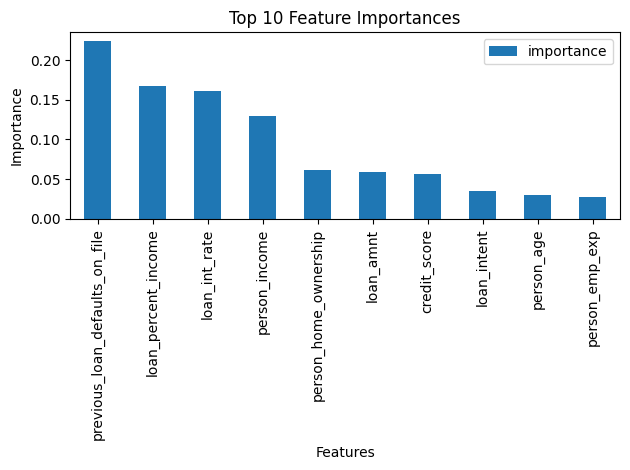

In [33]:
# Optional: Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(kind='bar', x='feature', y='importance')
plt.title('Top 10 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

## Using ML PipeLine:-

In [34]:
from sklearn.pipeline import Pipeline

In [35]:
# Create a pipeline with scaling and classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(
        n_estimators=100, 
        random_state=42
    ))
])

In [36]:
# Predict on test data
pipeline.fit(X_train, y_train)

d:\python developer\DSML-11A\employee-loan-flask-deployment\python_evn\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [37]:
# Predictions on test data
test_predictions = pipeline.predict(X_test)

In [38]:
print("\nTest Data Prediction Metrics:")
print("Accuracy:", accuracy_score(y_test, test_predictions))
print("Precision (Macro):", precision_score(y_test, test_predictions, average='macro'))
print("Recall (Macro):", recall_score(y_test, test_predictions, average='macro'))
print("F1 Score (Macro):", f1_score(y_test, test_predictions, average='macro'))


Test Data Prediction Metrics:
Accuracy: 0.9263216471897607
Precision (Macro): 0.9094938773125121
Recall (Macro): 0.8705225555942687
F1 Score (Macro): 0.8879713285314005


In [39]:
print("\nDetailed Classification Report (Test Data):")
print(classification_report(y_test, test_predictions))


Detailed Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6995
           1       0.88      0.77      0.82      1990

    accuracy                           0.93      8985
   macro avg       0.91      0.87      0.89      8985
weighted avg       0.92      0.93      0.92      8985



In [40]:
# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_predictions))


Confusion Matrix:
[[6790  205]
 [ 457 1533]]


In [41]:
# Feature Importance
feature_importances = pipeline.named_steps['classifier'].feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

In [42]:
print("\nTop 10 Most Important Features:")
print(feature_importance_df.head(10))


Top 10 Most Important Features:
                           Feature  Importance
12  previous_loan_defaults_on_file    0.223669
9              loan_percent_income    0.167004
8                    loan_int_rate    0.160364
3                    person_income    0.129894
5            person_home_ownership    0.061314
6                        loan_amnt    0.059046
11                    credit_score    0.056889
7                      loan_intent    0.035505
0                       person_age    0.029895
4                   person_emp_exp    0.027356


In [43]:
X_test

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
32402,52.0,0,3,43018.0,28,3,6000.0,4,11.01,0.14,22.0,639,1
28634,33.0,1,3,133080.0,11,3,10000.0,5,13.57,0.08,9.0,657,1
9200,24.0,0,0,72814.0,1,0,2800.0,5,9.32,0.04,4.0,605,1
38825,28.0,1,1,60893.0,3,0,20000.0,2,12.83,0.33,6.0,566,1
25175,32.0,1,0,48636.0,10,3,12000.0,0,11.89,0.25,10.0,587,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28964,28.0,1,3,67987.0,5,0,8400.0,1,7.51,0.12,6.0,611,0
15383,23.0,1,0,144405.0,1,0,8000.0,2,11.01,0.06,2.0,684,0
14545,22.0,1,1,41670.0,3,3,15000.0,5,14.96,0.36,4.0,585,0
31190,36.0,1,3,41118.0,16,3,12000.0,1,11.36,0.29,13.0,575,0


In [44]:
y_test

,loan_status
32402,0
28634,0
9200,0
38825,0
25175,0
...,...
28964,0
15383,1
14545,1
31190,1


In [45]:
pipeline.predict([[23.0,1,0,144405.0,1,0,8000.0,2,11.01,0.06,2.0,684,0]])

d:\python developer\DSML-11A\employee-loan-flask-deployment\python_evn\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [46]:
pipeline.predict([[25.0,1,0,68116.0,0,0,15000.0,0,10.48,0.22,2.0,616,1]])

d:\python developer\DSML-11A\employee-loan-flask-deployment\python_evn\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [47]:
filepath='trained_model.pkl'

In [48]:
"""
Save trained model and scaler
"""
# pickle.dump({
#     'pipeline': pipeline
# }, filepath)

#pickle.dump(pipeline,open('trained_model.pkl','wb'))

# Save the model 
# with open('trained_model.pkl', 'wb') as model_file: 
#     joblib.dump(pipeline, model_file)

with open('model.pkl', 'wb') as model_file: 
    pickle.dump(pipeline, model_file)

In [49]:
# Load the model 
with open('model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

In [50]:
model.predict([[23.0,1,0,144405.0,1,0,8000.0,2,11.01,0.06,2.0,684,0]])


d:\python developer\DSML-11A\employee-loan-flask-deployment\python_evn\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [51]:
res = model.predict([[40.0,1,0,68116.0,0,0,35000.0,0,10.48,0.22,2.0,616,1]])

d:\python developer\DSML-11A\employee-loan-flask-deployment\python_evn\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [52]:
print(res[0])

0


In [53]:
prediction = model.predict([[25.0,1,0,68116.0,0,0,15000.0,0,10.48,0.22,2.0,616,1]]) 
probabilities = model.predict_proba([[40.0,1,0,68116.0,0,0,35000.0,0,10.48,0.22,2.0,616,1]])
probabilities 

d:\python developer\DSML-11A\employee-loan-flask-deployment\python_evn\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
d:\python developer\DSML-11A\employee-loan-flask-deployment\python_evn\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.96, 0.04]])